# Kapitel 8 - Support Vector Machines

## 8.1. Kapitelübersicht <a class="anchor" id="8-1"/>

In diesem Kapitel behandeln wir die Support Vector Machines, eines der populärsten Klassifizierungsverfahren. Die Vorgehensweise beim Klassifizieren unterscheidet sich vom Naive Bayes und Logistic Regression Verfahren, da Support Vector Machines mit einer <b>Entscheidungsgrenze</b> zwischen Datenpunkten und der Optimierung dieser Grenze arbeiten. Die Funktionsweise von Support Vector Machines wird in diesem Kapitel weniger mathematisch als die anderen Klassifizierungsverfahren behandelt, da dies zu schnell zu komplex werden könnte.

<b>Abschnittsübersicht</b><br>

[8.1. Kapitelübersicht](#8-1)<br>
[8.2. Support Vector Machines](#8-2)<br>
[8.3. Implementierung in Scikit learn](#8-3)<br>
[8.4. Mögliche Fehler](#8-4)<br>

Am Ende dieses Kapitel werden wir folgende Themen behandelt und/oder vertieft haben:
- Intuition von Support Vector Machines
- Implementierung von SVMs in Scikit learn
- Hyperparameteroptimierung & Visualisierung von SVMs

## 8.2. Support Vector Machines <a class="anchor" id="8-2"/>

Das <b>Support Vector Machines</b> Verfahren (kurz: SVM) ist eines der populärsten Klassifizierungsverfahren. Es gehört nicht zu den <b>probabilistischen Klassifizierungsverfahren</b>, sondern zu den <b>Kernel-Methoden</b>. 

SVMs klassifizieren, indem sie versuchen, eine gute <b>Entscheidungsgrenze</b> (englisch: decision boundary) zwischen zwei Klassen von Punkten zu berechnen. Um neue Datenpunkte zu klassifizieren, muss lediglich geprüft werden, auf welcher Seite der Entscheidungsgrenze sie sich befinden.

<img src="tutorialdata/img/svm_decision_boundary.png" alt="SVM Decision Boundary" align="center" width="100px;"><br><div style="text-align: center; font-size:10px;">CHOLLET, Francois, Deep Learning with Keras, New York 2018, S. 15. </div></img><br>

Die Berechnung der Entscheidungsgrenze ist die Hauptaufgabe der SVM. Für die Berechnung transformiert die SVM die Daten in einen hochdimensionalen Vektorraum, in dem die Datenpunkte oder Objekte als Vektoren dargestellt werden. In diesem Raum kann die Entscheidungsgrenze als <b>hyperplane</b> (deutsch: Hyperebene) formuliert werden, die von der SVM erlernt werden kann. Diese hyperplane ist im zweidimensionalen Raum eine Linie und im dreidimensionalen Raum eine Ebene. Ab einem vierdimensionalen Raum wird eine Visualisierung dieser Hyperebene kompliziert und ungenau.

<img src="https://images.deepai.org/glossary-terms/3bb86574825445cba73a67222b744648/hyperplane.png" alt="Hyperplane" style="width: 550px;"/><br>


Damit die hyperplane eine gute Entscheidungsgrenze wird, muss der Abstand zwischen der hyperplane und den <b>Support Vectors</b> (deutsch: Stützvektoren) maximiert werden. Die Support Vectors sind jeweils die Vektoren der Klassen, die am nähesten zur hyperplane liegen. Der Abstand der Support Vectors zu der hyperplane soll <u>maximiert</u> werden. Der Vorteil dieser <b>Maximierung des Randbereichs</b> (englisch: maximizing the margin) liegt darin, dass sich damit die Entscheidungsgrenze auf neue Datenpunkte, die keine Punkte des Trainingdatensatzes waren, verallgemeinern lässt.

<img src="https://pvsmt99345.i.lithium.com/t5/image/serverpage/image-id/53831iD79E26B431902DF3/image-size/large?v=1.0&px=999" alt="Support Vectors" style="width: 400px;"/><br>

Die Berechnungen, die Datenpunkte in einen hochdimensionalen Vektorraum zu transformieren, sind sehr komplex. Deshalb nutzen SVMs den <b>Kernel-Trick</b>, wonach die Kernel-Methoden benannt sind. Anstatt dass alle Datenpunktkoordinaten im hochdimensionalen Vektorraum berechnet werden, wird nur der Abstand von Datenpunktpaaren berechnet. Für weitere Information zu SVMs und deren Funktionsweise siehe den <a href="https://machinelearningmastery.com/support-vector-machines-for-machine-learning/">Blog-Eintrag</a> von Jason Brownlee.

## 8.3. Implementierung in Scikit learn <a class="anchor" id="8-3"/>

In [1]:
import pandas as pd
corpus = pd.read_csv("tutorialdata/corpora/wikicorpus_v2.csv", index_col=0)

SVM ist in Scikit learn in mehreren Ausführungen verfügbar. Die Unterschiede werden in der <a href="https://scikit-learn.org/stable/modules/svm.html">Dokumentation</a> erläutert. Wir werden `LinearSVC` verwenden, welches die "One vs. Rest" Methode verwendet. Diese funktioniert nach dem gleichen Prinzip wie <b>One vs. Rest Logistic Regression</b> (siehe dafür Kapitel 6.3.3.).

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

labels = corpus["category"]
vector  = TfidfVectorizer().fit_transform(corpus["text"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)

def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = LinearSVC(C=C)
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
classify_svm()

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.933.

Der F1-score für die Klassifizierung mit SVM ist 0.958.


SVM bietet leicht bessere Werte als die Logistic Regression mit Hyperparameteroptimierung aus dem vorherigen Kapitel. Wir versuchen nun, mithilfe von Hyperparameteroptimierung SVM noch zu verbessern. Wie benutzen hier Grid Search und passen zuerst nur den `C` Parameter an. Dieser gibt an, wie sehr wir eine Missklassifikation der einzelnen Trainingsbeispiele vermeiden möchte. Werden große Werte für `C` gewählt, wird nach einer hyperplane mit einem kleinen Rand gesucht, bei kleinen Werten nach einer hyperplane mit einem größerem Rand.

#### Hyperparameteroptimierung von SVM

In [4]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])}

grid = GridSearchCV(LinearSVC(), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

Der beste Hyperparameter für C ist 3.0.
Der beste Score ist 0.9427.


Als bester `C`-Wert wird `3.0` angegeben. Setzen wir diesen Wert jedoch in unser Klassifizierungsverfahren ein, ändern sich die Werte nicht.

In [5]:
classify_svm(C=3.0, cv=3)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.934.

Der F1-score für die Klassifizierung mit SVM ist 0.958.


Schaut man sich die <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC">Dokumentation</a> an, scheinen die meisten Parameter für eine Erhöhung des F1-scores nicht relevant zu sein. Eine weitere Intuition zur Verbesserung der scores ist eine Erhöhung von `cv`. `cv = 3` ist ein kleiner Wert, den ich gewählt hatte, um die Berechnungszeit zu verkürzen. Wir verwenden nun `cv = 10`.

In [6]:
classify_svm(C=3.0, cv=10)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.946.

Der F1-score für die Klassifizierung mit SVM ist 0.958.


Der Mittelwert der cross validation hat sich tatsächlich um 0.1 gesteigert. Dies könnte ein Identifikator dafür sein, dass `cv = 3` zu gering war. Im weiteren Verlauf dieser Tutorialreihe werden wir `cv = 3` aufgrund der kurzen Berechnungszeit beibehalten, für tatsächliche Klassifikationen sollten jedoch verschiedene Werte ausprobiert werden.

#### Visualisierung der SVM mit der Confusion Matrix

Da wir mit der Hyperparameteroptimierung nicht mehr viel an der Genauigkeit unseres SVM Verfahrens ändern konnten, visualisieren wir die SVM mit der Confusion Matrix, um falsche Klassifikationen erkennen zu können.

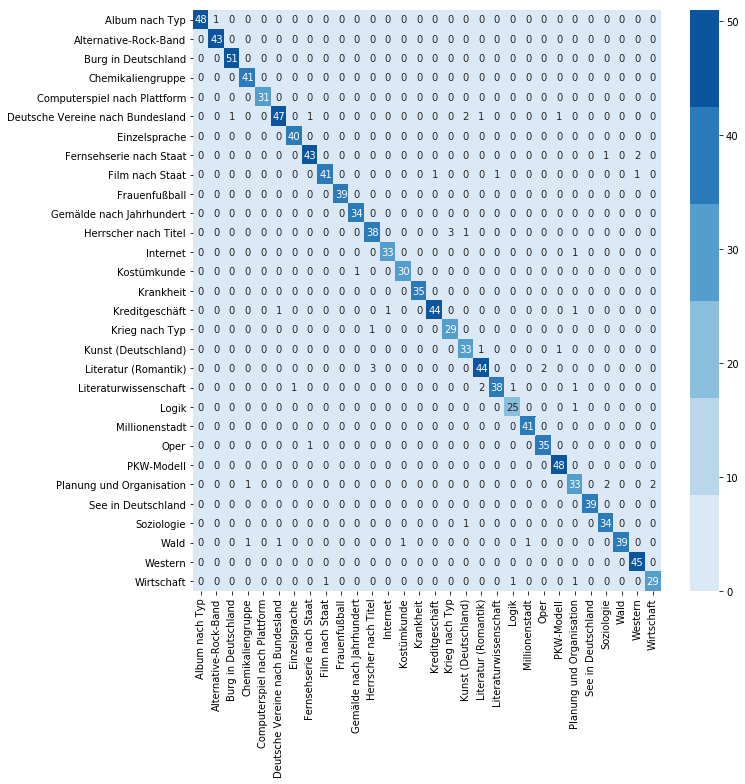

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

svm_classifier = LinearSVC(C=3.0)
svm = svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# Die Original Kategorienbezeichnungen
classes = corpus["category"].drop_duplicates().tolist()

# Ein DataFrame mit den Kategorienbezeichnungen als Reihen und Spalten
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
    
plt.figure(figsize=(11,11))
sns.heatmap(cnf_df, annot=True, cmap=sns.color_palette("Blues"))
plt.tight_layout()
plt.show()

Bei der Confusion Matrix konnten keine großen Ausreißer festgestellt werden. "3" ist der höchste Wert für die Missklassifizierungen. Vergleichen wir diesen mit den Werten für die Missklassifizierungen aus Kapitel 5.4, wo mehrere Werte "7" oder "10" sind, scheint "3" nicht besonders hoch. Bei einem F1-score von 0.958 ist dies auch nicht sonderlich verwunderlich, da dieser ein sehr guter Wert für eine Klassifizierung ist. Ein Blick auf den Classification Report zeigt zudem, dass es keinen Unterschied zwischen den verschiedenen F1-score `average`-Parametern gibt.

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                                  precision    recall  f1-score   support

                  Album nach Typ       1.00      0.98      0.99        49
           Alternative-Rock-Band       0.98      1.00      0.99        43
             Burg in Deutschland       0.98      1.00      0.99        51
               Chemikaliengruppe       0.95      1.00      0.98        41
    Computerspiel nach Plattform       1.00      1.00      1.00        31
Deutsche Vereine nach Bundesland       0.96      0.89      0.92        53
                   Einzelsprache       0.98      1.00      0.99        40
         Fernsehserie nach Staat       0.96      0.93      0.95        46
                 Film nach Staat       0.98      0.93      0.95        44
                   Frauenfußball       1.00      1.00      1.00        39
        Gemälde nach Jahrhundert       0.97      1.00      0.99        34
            Herrscher nach Titel       0.90      0.90      0.90        42
                        Internet     

SVM ist ein sehr populäres Klassifikationsverfahren, welches nicht für allen Bereiche der Klassifikation geeignet ist. In unserem Fall lieferte es bis dato die besten Werte. Wir befinden uns nun an einem Punkt der Tutorialreihe, in der die Verbesserung der Cross Validation- und F1-Scores für die verschiedenen Klassifizierungsverfahren nur noch minimal sind oder es aber zur Verschlechterung der Scores kommt.

## 8.4. Mögliche Fehler <a class="anchor" id="8-4"/>

- Confusion Matrix Grafik ist zu groß/ zu klein → Werte bei `plt.figure(figsize=(11,11))` verändern
- Confusion Matrix Grafik ist unscharf → Bei Importen folgendes hinzufügen:<br>
```%matplotlib inline
%config InlineBackend.figure_format = 'svg'```